<a href="https://colab.research.google.com/github/Huda-AlGhussein/HousePrices/blob/main/House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Case Study: House Prices
Objective: In this colab, I will explore a dataset of house prices data with the below info. I will predict the prices of house for based the following information.

#DataSet Description:
- **SalePrice:** the property's sale price in dollars. This is the target variable that I am trying to predict.<br>
- **MSSubClass:** The building class<br>
- **MSZoning:** The general zoning classification
- **LotFrontage:** Linear feet of street connected to property
- **LotArea:** Lot size in square feet
- **Street:** Type of road access
- **Alley:** Type of alley access
- **LotShape:** General shape of property
- **LandContour:** Flatness of the property
- **Utilities:** Type of utilities available
- **LotConfig:** Lot configuration
- **LandSlope:** Slope of property
- **Neighborhood:** Physical locations within Ames city limits
- **Condition1:** Proximity to main road or railroad
- **Condition2:** Proximity to main road or railroad (if a second is present)
- **BldgType:** Type of dwelling
- **HouseStyle:** Style of dwelling
- **OverallQual:** Overall material and finish quality
- **OverallCond:** Overall condition rating
- **YearBuilt:** Original construction date
- **YearRemodAdd:** Remodel date
- **RoofStyle:** Type of roof
- **RoofMatl:** Roof material
- **Exterior1st:** Exterior covering on house
- **Exterior2nd:** Exterior covering on house (if more than one material)
- **MasVnrType:** Masonry veneer type
- **MasVnrArea:** Masonry veneer area in square feet
- **ExterQual:** Exterior material quality
- **ExterCond:** Present condition of the material on the exterior
- **Foundation:** Type of foundation
- **BsmtQual:** Height of the basement
- **BsmtCond:** General condition of the basement
- **BsmtExposure:** Walkout or garden level basement walls
- **BsmtFinType1:** Quality of basement finished area
- **BsmtFinSF1:** Type 1 finished square feet
- **BsmtFinType2:** Quality of second finished area (if present)
- **BsmtFinSF2:** Type 2 finished square feet
- **BsmtUnfSF:** Unfinished square feet of basement area
- **TotalBsmtSF:** Total square feet of basement area
- **Heating:** Type of heating
- **HeatingQC:** Heating quality and condition
- **CentralAir:** Central air conditioning
- **Electrical:** Electrical system
- **1stFlrSF:** First Floor square feet
- **2ndFlrSF:** Second floor square feet
- **LowQualFinSF:** Low quality finished square feet (all floors)
- **GrLivArea:** Above grade (ground) living area square feet
- **BsmtFullBath:** Basement full bathrooms
- **BsmtHalfBath:** Basement half bathrooms
- **FullBath:** Full bathrooms above grade
- **HalfBath:** Half baths above grade
- **Bedroom:** Number of bedrooms above basement level
- **Kitchen:** Number of kitchens
- **KitchenQual:** Kitchen quality
- **TotRmsAbvGrd:** Total rooms above grade (does not include bathrooms)
- **Functional:** Home functionality rating
- **Fireplaces:** Number of fireplaces
- **FireplaceQu:** Fireplace quality
- **GarageType:** Garage location
- **GarageYrBlt:** Year garage was built
- **GarageFinish:** Interior finish of the garage
- **GarageCars:** Size of garage in car capacity
- **GarageArea:** Size of garage in square feet
- **GarageQual:** Garage quality
- **GarageCond:** Garage condition
- **PavedDrive:** Paved driveway
- **WoodDeckSF:** Wood deck area in square feet
- **OpenPorchSF:** Open porch area in square feet
- **EnclosedPorch:** Enclosed porch area in square feet
- **3SsnPorch:** Three season porch area in square feet
- **ScreenPorch:** Screen porch area in square feet
- **PoolArea:** Pool area in square feet
- **PoolQC:** Pool quality
- **Fence:** Fence quality
- **MiscFeature:** Miscellaneous feature not covered in other categories
- **MiscVal:** $Value of miscellaneous feature
- **MoSold:** Month Sold
- **YrSold:** Year Sold
- **SaleType:** Type of sale
- **SaleCondition:** Condition of sale

# 1. Data Loading

#### Import necessary python modules

I will need the following libraries:
 - Numpy — for scientific computing (e.g., linear algebra (vectors & matrices)).
 - Pandas — providing high-performance, easy-to-use data reading, manipulation, and analysis.
 - Matplotlib — plotting & visualization.
 - scikit-learn — a tool for data mining and machine learning models.

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

#### Load the data

You can find the dataset [here](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data).


In [117]:
train= pd.read_csv('/content/train.csv')
test= pd.read_csv('/content/test.csv')
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [118]:
train = train.drop('Id', axis=1)
train.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


# 2. Exploratory Data Analysis

Let's dig deeper & understand the data

#### Visualize the data



Distribution of SalePrice

First, let's look at the distribution of SalePrice. This will help to know how much houses cost on average.

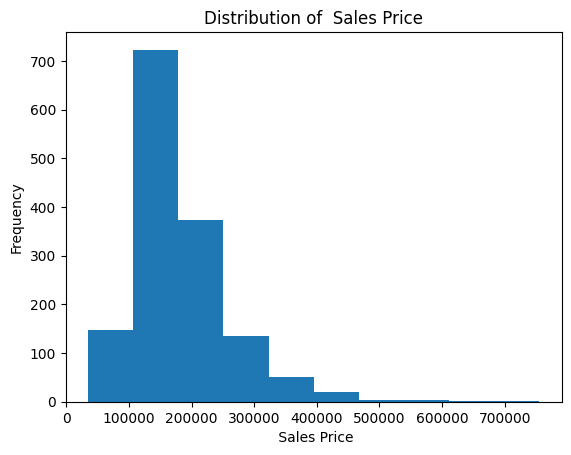

In [119]:
# plot the histogram of the SalePrice
train["SalePrice"].plot(kind="hist")
plt.title("Distribution of  Sales Price")
plt.xlabel(" Sales Price")
plt.ylabel("Frequency")
plt.show()

how many rows & columns in our dataset.

In [120]:
# get the number of rows and columns
rows = train.shape[0]
columns = train.shape[1]

print('There are {} rows and {} columns.'.format(rows,columns))

There are 1460 rows and 80 columns.


Using the function **info()**, we can check:
 - data types (int, float, or object (e.g., string))
 - missing values
 - memory usage
 - number of rows and columns

In [121]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Using the function **describe()**, we can check the mean, standard deviation, maximum, and minimum of each numerical feature (column)

In [122]:
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Checking the correlation of columns with my target "SalePrice"

In [123]:
# Calculate correlations with the target variable
correlations = train.corr()
target_corr = correlations['SalePrice'].sort_values(ascending=False)
print(target_corr)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


<ipython-input-123-a140bd0d3738>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = train.corr()


# 3. Data Preprocessing

Before cleaning the dataset, I will check the previous step "Correlation of columns with my target "SalePrice"" and delete columns with less than 0.1 correlation.


In [124]:
train.drop(['PoolArea','MoSold','3SsnPorch','BsmtFinSF2','BsmtHalfBath','MiscVal',
           'LowQualFinSF', 'YrSold', 'OverallCond','MSSubClass',
          'EnclosedPorch','KitchenAbvGr','BedroomAbvGr','ScreenPorch'], axis = 1)


,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,TA,Y,0,61,NaN,NaN,NaN,WD,Normal,208500
1,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,...,TA,Y,298,0,NaN,NaN,NaN,WD,Normal,181500
2,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,...,TA,Y,0,42,NaN,NaN,NaN,WD,Normal,223500
3,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,...,TA,Y,0,35,NaN,NaN,NaN,WD,Abnorml,140000
4,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,...,TA,Y,192,84,NaN,NaN,NaN,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,TA,Y,0,40,NaN,NaN,NaN,WD,Normal,175000
1456,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,TA,Y,349,0,NaN,MnPrv,NaN,WD,Normal,210000
1457,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,TA,Y,0,60,NaN,GdPrv,Shed,WD,Normal,266500
1458,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,TA,Y,366,0,NaN,NaN,NaN,WD,Normal,142125


##### Null Values

Let’s check for null values

In [125]:
train.isnull().sum().sort_values(ascending=False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
Heating           0
HeatingQC         0
MSZoning          0
1stFlrSF          0
SalePrice         0
Length: 80, dtype: int64

There is a lot of null values and it will be pointless to fill them out. Better option is to drop the column with 80% and more of the data is null.

In [126]:
# Preprocess the data
train_clean = train.copy()
train_clean = train_clean.drop(['PoolQC', 'MiscFeature', 'Alley','Fence'], axis = 1)

In [127]:
def show_null_values(df):
  """Shows the number of null values in each column of a DataFrame, but only shows columns with null values.

  Args:
    df: A Pandas DataFrame.

  Returns:
    None.
  """

  null_values = df.isnull().sum()
  columns_with_null_values = null_values[null_values > 0].index
  print('Columns with null values:')
  for column in columns_with_null_values:
    print(f'{column}: {null_values[column]}')

In [128]:
show_null_values(train_clean)

Columns with null values:
LotFrontage: 259
MasVnrType: 8
MasVnrArea: 8
BsmtQual: 37
BsmtCond: 37
BsmtExposure: 38
BsmtFinType1: 37
BsmtFinType2: 38
Electrical: 1
FireplaceQu: 690
GarageType: 81
GarageYrBlt: 81
GarageFinish: 81
GarageQual: 81
GarageCond: 81


 Based on the nature of each column and the number of missing values, here is how I will handle the missing values:
 - Since properties in the same neighborhood often have similar LotFrontage values.Therefor the best approach is to get the median of "LotFrontage" within each neighborhood group and fill the missing values with the median of their respective neighborhoods.
 - MasVnrType and MasVnrArea : For these features, I will fill the missing values with the most common value (mode) for MasVnrType and the median for MasVnrArea.
 - BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, and BsmtFinType2: I will replace the missing values in these basement-related columns with "NA" to indicate that there is no basement.
 - Electrical: Since there is only one missing value, I will drop this row.
 - FireplaceQu: Missing values in this column will be replaced with "NA" to indicate that there is no fireplace.
 - GarageType, GarageYrBlt, GarageFinish, GarageQual, and GarageCond: For these garage-related columns, I will replace the missing values with "NA" to indicate that there is no garage.

In [129]:
train_clean['LotFrontage'].fillna(train_clean.groupby('Neighborhood')['LotFrontage'].transform('median'), inplace=True)
train_clean['MasVnrType'].fillna(train_clean['MasVnrType'].mode()[0], inplace=True)
train_clean['MasVnrArea'].fillna(train_clean['MasVnrArea'].median(), inplace=True)
train_clean['BsmtQual'].fillna('NA', inplace=True)
train_clean['BsmtCond'].fillna('NA', inplace=True)
train_clean['BsmtExposure'].fillna('NA', inplace=True)
train_clean['BsmtFinType1'].fillna('NA', inplace=True)
train_clean['BsmtFinType2'].fillna('NA', inplace=True)
train_clean.dropna(subset=['Electrical'], inplace=True)
train_clean['FireplaceQu'].fillna('NA', inplace=True)
train_clean['GarageType'].fillna('NA', inplace=True)
train_clean['GarageYrBlt'].fillna('NA', inplace=True)
train_clean['GarageFinish'].fillna('NA', inplace=True)
train_clean['GarageQual'].fillna('NA', inplace=True)
train_clean['GarageCond'].fillna('NA', inplace=True)


In [130]:
show_null_values(train_clean)

Columns with null values:


##### Convert Categorical to Numerical

Next I am going to convert categorical variables to numerical variables

In [131]:
obj = (train_clean.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (train_clean.dtypes == 'int')
int_cols = list(int_[int_].index)
print("Integer variables:",len(int_cols))

fl = (train_clean.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 40
Integer variables: 34
Float variables: 2


In [132]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
categorical_columns= train_clean.select_dtypes(include=['category', 'object']).columns

for column in categorical_columns:
    train_clean[column] = train_clean[column].astype(str)

for column in categorical_columns:
    train_clean[column] = encoder.fit_transform(train_clean[column])

##### Normalization

In [133]:
train_clean_max =train_clean.max() # get max per each column in dataset
train_clean_max

MSSubClass          190.0
MSZoning              4.0
LotFrontage         313.0
LotArea          215245.0
Street                1.0
                   ...   
MoSold               12.0
YrSold             2010.0
SaleType              8.0
SaleCondition         5.0
SalePrice        755000.0
Length: 76, dtype: float64

In [134]:
train_clean = train_clean.divide(train_clean_max) # divide value for each column value by max
train_clean.describe()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,...,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,0.299376,0.757197,0.224274,0.048862,0.995888,0.647247,0.925748,0.000685,0.754626,0.031186,...,0.039799,0.006716,0.031399,0.003741,0.002808,0.526902,0.998913,0.939085,0.754078,0.239643
std,0.222688,0.158058,0.071692,0.046387,0.064018,0.469789,0.235962,0.026180,0.405747,0.138161,...,0.110756,0.057731,0.116198,0.054459,0.032019,0.225361,0.000661,0.194072,0.220243,0.105257
min,0.105263,0.000000,0.067093,0.006040,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.998010,0.000000,0.000000,0.046225
25%,0.105263,0.750000,0.191693,0.035072,1.000000,0.000000,1.000000,0.000000,0.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.416667,0.998507,1.000000,0.800000,0.172119
50%,0.263158,0.750000,0.223642,0.044029,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.999005,1.000000,0.800000,0.215894
75%,0.368421,0.750000,0.255591,0.053906,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.999502,1.000000,0.800000,0.283444
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


As you can see, the maximum values for all numerical columns is 1. This means that our data is normalized

# 4. Training and Validation


In [135]:
x = train_clean.iloc[:, :-1]
y = train_clean['SalePrice']

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size =0.3)

I will tune the hyperparameter to find the best hyperparameter values for the model.

In [136]:
# Create a list of hyperparameter values to try
hyperparameter_values = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7]}

In [137]:
# Define a function to train and evaluate the model with a given set of hyperparameter values
def train_and_evaluate_model(hyperparameter_values):
    model = XGBRegressor(**hyperparameter_values)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_val)
    mse = np.mean((y_pred - y_val)**2)
    return mse

In [138]:
best_mse = np.inf
best_hyperparameter_values = {}
for n_estimators in hyperparameter_values['n_estimators']:
    for learning_rate in hyperparameter_values['learning_rate']:
        for max_depth in hyperparameter_values['max_depth']:
            hyperparameter_values_to_try = {
                'n_estimators': n_estimators,
                'learning_rate': learning_rate,
                'max_depth': max_depth
            }
            mse = train_and_evaluate_model(hyperparameter_values_to_try)
            if mse < best_mse:
                best_mse = mse
                best_hyperparameter_values = hyperparameter_values_to_try

# Print the best hyperparameter values and the best MSE
print('Best hyperparameter values:', best_hyperparameter_values)
print('Best MSE:', best_mse)

Best hyperparameter values: {'n_estimators': 200, 'learning_rate': 0.1, 'max_depth': 3}
Best MSE: 0.000958437004025927


I want to visualize the top 10 features that affect the Sales Price.

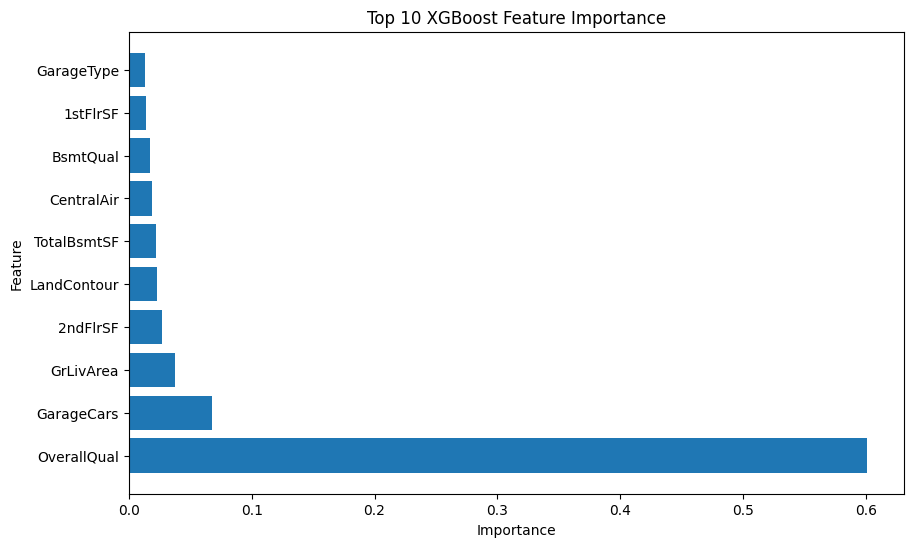

In [139]:
model = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=7)  # Replace with your model

# Fit the model to your training data (x_train, y_train) before accessing feature importance
model.fit(x_train, y_train)
# Get the names of the features from your x_train DataFrame
column_names = x_train.columns.values

# Get feature importance scores from the trained model
feature_importance = model.feature_importances_

# Create a DataFrame to hold feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': column_names, 'Importance': feature_importance})

# Sort the DataFrame by importance score in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select the top 5 features
top_5_features = feature_importance_df.head(10)

# Horizontal bar plot to visualize the top 5 features' importance
plt.figure(figsize=(10, 6))
plt.barh(top_5_features['Feature'], top_5_features['Importance'])
plt.title('Top 10 XGBoost Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# 5. Apply the model to the test dataset


In [140]:
test.drop(['PoolArea','MoSold','3SsnPorch','BsmtFinSF2','BsmtHalfBath','MiscVal',
           'LowQualFinSF', 'YrSold', 'OverallCond','MSSubClass',
            'EnclosedPorch','KitchenAbvGr','BedroomAbvGr','ScreenPorch'], axis = 1)

,Id,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,1461,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,TA,TA,Y,140,0,NaN,MnPrv,NaN,WD,Normal
1,1462,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,TA,TA,Y,393,36,NaN,NaN,Gar2,WD,Normal
2,1463,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,TA,TA,Y,212,34,NaN,MnPrv,NaN,WD,Normal
3,1464,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,TA,TA,Y,360,36,NaN,NaN,NaN,WD,Normal
4,1465,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,TA,TA,Y,0,82,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,Y,0,0,NaN,NaN,NaN,WD,Normal
1455,2916,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,TA,TA,Y,0,24,NaN,NaN,NaN,WD,Abnorml
1456,2917,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,TA,TA,Y,474,0,NaN,NaN,NaN,WD,Abnorml
1457,2918,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,Y,80,32,NaN,MnPrv,Shed,WD,Normal


In [141]:
test = test.drop(['PoolQC', 'MiscFeature', 'Alley','Fence'], axis = 1)

In [142]:
test['LotFrontage'].fillna(test.groupby('Neighborhood')['LotFrontage'].transform('median'), inplace=True)
test['MasVnrType'].fillna(test['MasVnrType'].mode()[0], inplace=True)
test['MasVnrArea'].fillna(test['MasVnrArea'].median(), inplace=True)
test['BsmtQual'].fillna('NA', inplace=True)
test['BsmtCond'].fillna('NA', inplace=True)
test['BsmtExposure'].fillna('NA', inplace=True)
test['BsmtFinType1'].fillna('NA', inplace=True)
test['BsmtFinType2'].fillna('NA', inplace=True)
test.dropna(subset=['Electrical'], inplace=True)
test['FireplaceQu'].fillna('NA', inplace=True)
test['GarageType'].fillna('NA', inplace=True)
test['GarageYrBlt'].fillna('NA', inplace=True)
test['GarageFinish'].fillna('NA', inplace=True)
test['GarageQual'].fillna('NA', inplace=True)
test['GarageCond'].fillna('NA', inplace=True)

In [143]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
categorical_columns= test.select_dtypes(include=['category', 'object']).columns

for column in categorical_columns:
    test[column] = test[column].astype(str)

for column in categorical_columns:
    test[column] = encoder.fit_transform(test[column])

In [144]:
#saving the column Id
test_ids= test['Id']
test = test.drop('Id', axis=1)

In [145]:
test_max =test.max()

In [146]:
test = test.divide(test_max) # divide value for each column value by max
test.describe()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1459.000000,1459.000000,1459.000000,...,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,0.301991,0.606443,0.344776,0.173483,0.995888,0.650902,0.92552,0.001371,0.773132,0.022618,...,0.065113,0.023956,0.004984,0.029626,0.002180,0.003422,0.508682,0.998890,0.830021,0.757505
std,0.224984,0.138331,0.104995,0.087553,0.064018,0.470250,0.23378,0.037012,0.396449,0.108783,...,0.092835,0.066431,0.056133,0.098281,0.038115,0.037106,0.226869,0.000648,0.181618,0.211087
min,0.105263,0.000000,0.105000,0.025972,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.998010,0.000000,0.000000
25%,0.105263,0.600000,0.300000,0.130583,1.000000,0.000000,1.00000,0.000000,0.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.998507,0.888889,0.800000
50%,0.263158,0.600000,0.350000,0.166060,1.000000,1.000000,1.00000,0.000000,1.000000,0.000000,...,0.037736,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.999005,0.888889,0.800000
75%,0.368421,0.600000,0.400000,0.203489,1.000000,1.000000,1.00000,0.000000,1.000000,0.000000,...,0.097035,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.999502,0.888889,0.800000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [147]:
predicted_sale_price= model.predict(test)

In [148]:
predicted_sale_price

array([0.2009654 , 0.23324701, 0.25349844, ..., 0.21301644, 0.1675498 ,
       0.35597026], dtype=float32)

In [149]:
predicted_sale_price= predicted_sale_price*train_clean_max['SalePrice']

In [150]:
final_results = pd.DataFrame({'Id': test_ids, 'SalePrice': predicted_sale_price})

In [151]:
final_results = final_results.set_index('Id')

In [152]:
print(final_results)

          SalePrice
Id                 
1461  151728.875000
1462  176101.500000
1463  191391.312500
1464  208191.656250
1465  211606.843750
...             ...
2915   93770.078125
2916   90542.617188
2917  160827.406250
2918  126500.101562
2919  268757.562500

[1459 rows x 1 columns]


In [153]:
final_results.to_csv('final_predictions.csv')